#04. PYTORCH CUSTOM DATASETS

GEET YOUR OWN DATA INTO PYTORCH USSSSINGGG

CUSTOM DATASETS

In [101]:
from torch import nn
import torch

import torch
print(f"Torch version: {torch.__version__}")
print(f"Is CUDA available? {torch.cuda.is_available()}")


Torch version: 2.9.0+cu126
Is CUDA available? True


In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

GET DATA
subset of a food101 dataset
our dataset satrts with 3 classes of food and only 10% of the images(-75 training,25 testing)


When starting ml projects its important to try starting with small and then increase the scale when necessary

In [103]:
import requests
import zipfile
import shutil  # Added for folder deletion
from pathlib import Path

data_path = Path('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data')
image_path = data_path / 'pizza_steak_sushi'
zip_filepath = data_path / 'pizza_steak_sushi.zip'

# 1. Logic to handle the 'ghost' directory
if image_path.is_dir():
    # Check if the folder is actually empty or just contains the zip
    if not any(image_path.iterdir()):
        print(f"Directory {image_path} is empty. Removing and starting fresh...")
        shutil.rmtree(image_path)
    else:
        print(f"{image_path} directory already exists... skipping download")

# 2. Download and Unzip (Only runs if directory doesn't exist)
if not image_path.is_dir():
    print(f"{image_path} doesn't exist, creating new one...")
    image_path.mkdir(parents=True, exist_ok=True)

    url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"

    print(f"Downloading raw data from GitHub...")
    request = requests.get(url)

    with open(zip_filepath, 'wb') as f:
        f.write(request.content)

    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        print(f"Unzipping pizza, steak, and sushi data...")
        zip_ref.extractall(image_path)

    # Optional: Remove the zip file after unzipping to keep things clean
    zip_filepath.unlink()
    print("Cleanup complete: Zip file removed.")

/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi directory already exists... skipping download


becoming one with the data(data prep and data exploration)

In [104]:
import os
def walk_through_dir(dir_path):
    '''walk thorugh dir_path returning its contents'''
    for dirpath,dirnames,filenames in os.walk(dir_path):

        print(f'there are {len(dirnames)}, directories and {len(filenames)} images in{dirpath}')

In [105]:
walk_through_dir(image_path)

there are 2, directories and 0 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi
there are 3, directories and 0 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train
there are 0, directories and 72 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi
there are 0, directories and 75 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/steak
there are 0, directories and 78 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza
there are 3, directories and 0 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/test
there are 0, directories and 31 images in/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/note

setup training and test paths


In [106]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir ,test_dir

(PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/test'))

visualize image:
get all iimage paths
pick random image path with random.choice
get image class name using pathlib.Path.parent.stem
open image with python pil
well then show the image and print metadata

[PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/765684.jpg'), PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/385154.jpg'), PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/686426.jpg'), PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/1957449.jpg'), PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/3004029.jpg'), PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/1221830.jpg'), PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/748830.jpg'), PosixPath('/Users/haydenfletcher/Docu

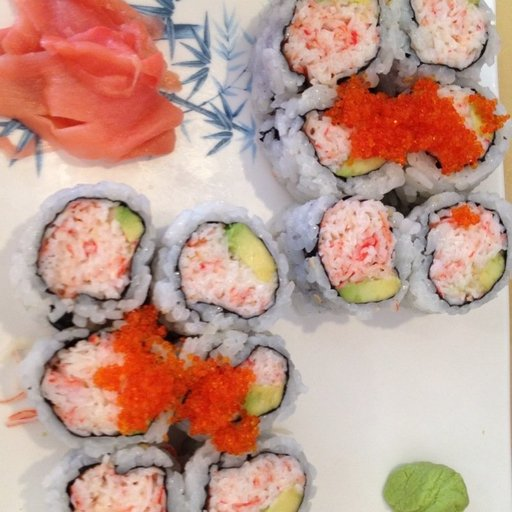

In [107]:
from PIL import Image
import random

random.seed(42)

image_path_list = list(image_path.glob('*/*/*.jpg'))
print(image_path_list)


random_image_path = random.choice(image_path_list)
print(random_image_path)


#get image class from path name
image_class = random_image_path.parent.stem
print(image_class)


#opne image with pil
img = Image.open(random_image_path)
#print(metadata)

print(f'random image path:{random_image_path}')
print(f'random image class:{image_class}')
print(f'image height:{img.height}')

print(f'image width{img.width}')
img

Text(0.5, 1.0, 'image classsushi, image shape:(512, 512, 3) -> height,width,colourchannels')

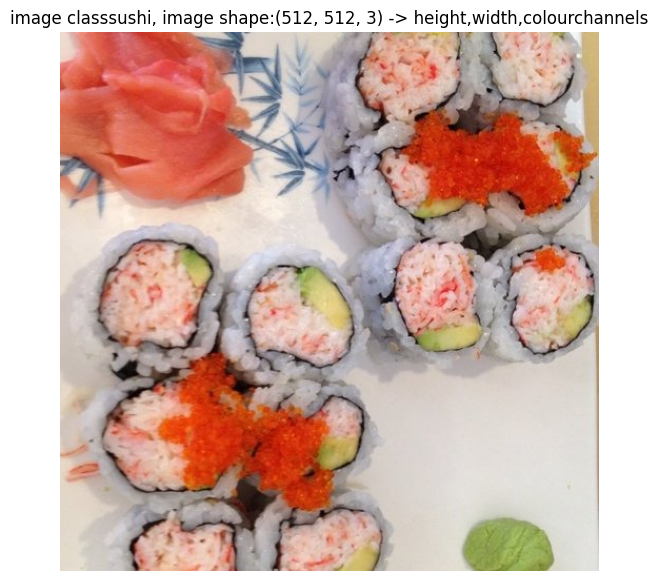

In [108]:
import numpy as np

import matplotlib.pyplot as plt


#turn image inot a rray

img_as_array = np.asarray(img)

plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(f'image class{image_class}, image shape:{img_as_array.shape} -> height,width,colourchannels')

transforming data

before we can use our imgae data into pytorch:
turn the target data into tensors

turn into a torch.utils.data.dataset and subsequently a torch.utils.data.Dataloader, we call these datasets and dataloaders

In [109]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [110]:
data_transform = transforms.Compose([#resize to 64,64
                                     transforms.Resize(size = (64,64)),

                                     #flip randommy on the horizontal,
                                     transforms.RandomHorizontalFlip(p = .5),
                                     transforms.ToTensor()])

In [111]:
data_transform(img)


tensor([[[0.8196, 0.8196, 0.8863,  ..., 0.9098, 0.8941, 0.9294],
         [0.8235, 0.8157, 0.8039,  ..., 0.9020, 0.9059, 0.9333],
         [0.8196, 0.8078, 0.7804,  ..., 0.9255, 0.9333, 0.9412],
         ...,
         [0.8784, 0.8863, 0.8784,  ..., 0.8627, 0.8863, 0.8863],
         [0.8784, 0.8824, 0.8745,  ..., 0.8784, 0.8902, 0.8863],
         [0.8745, 0.8824, 0.8745,  ..., 0.8824, 0.8941, 0.8863]],

        [[0.7255, 0.7373, 0.8706,  ..., 0.5686, 0.7137, 0.8392],
         [0.7216, 0.7294, 0.7804,  ..., 0.5882, 0.7608, 0.8510],
         [0.7176, 0.7255, 0.7451,  ..., 0.6039, 0.7686, 0.8353],
         ...,
         [0.8745, 0.8824, 0.8784,  ..., 0.8392, 0.8588, 0.8588],
         [0.8824, 0.8863, 0.8784,  ..., 0.8510, 0.8627, 0.8588],
         [0.8784, 0.8863, 0.8784,  ..., 0.8549, 0.8627, 0.8588]],

        [[0.4941, 0.5412, 0.8353,  ..., 0.5098, 0.6745, 0.8000],
         [0.4941, 0.5333, 0.7412,  ..., 0.5412, 0.7255, 0.8039],
         [0.4902, 0.5255, 0.6902,  ..., 0.5686, 0.7373, 0.

transforms help you get your images ready to be used for a model/perform data augmentation

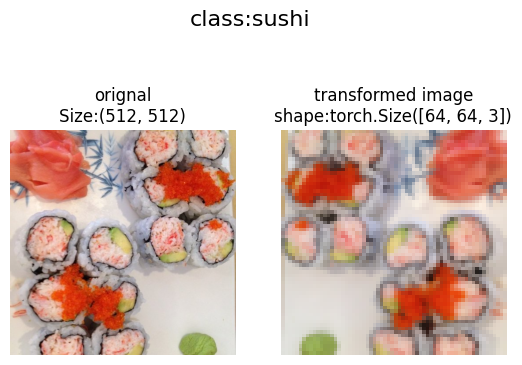

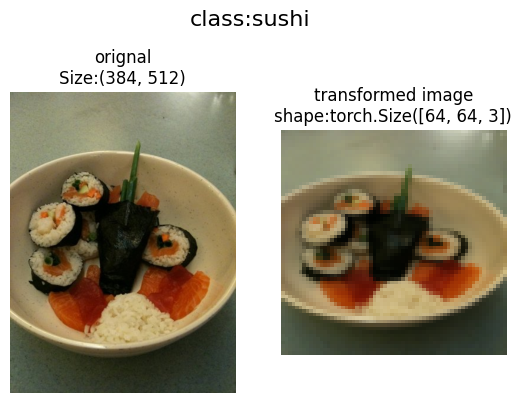

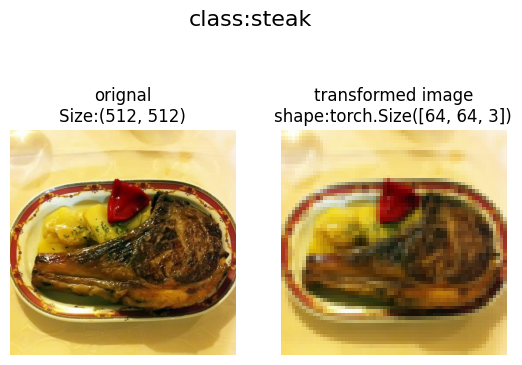

In [112]:
def plot_transformed_images(image_paths:list,transform,n = 3,seed = 42):

    """
    Selects random images from a path of images and loads/transorms them then plots the original vs the transformed version.
    """
    if seed:
        random.seed(seed)
        random_image_paths= random.sample(image_paths, k = n)
        for image_path in random_image_paths:
            with Image.open(image_path) as f:
                fig,ax = plt.subplots(nrows = 1,ncols = 2)
                ax[0].imshow(f)
                ax[0].set_title(f'orignal\nSize:{f.size}')
                ax[0].axis(False)

            #transform and plot target image
            #must permute to put colour channelss at the end
            transformed_image = transform(f).permute(1,2,0)#(C,H,W) - > (H,W,C)

            ax[1].imshow(transformed_image)
            ax[1].set_title(f'transformed image\nshape:{transformed_image.shape}')

            ax[1].axis(False)
            fig.suptitle(f'class:{image_path.parent.stem}',fontsize = (16))




plot_transformed_images(image_paths=image_path_list ,transform = data_transform,n = 3,seed = 42)



option1:
loading image using imagefolder

we can load image classsification data using torchvision.datasets.ImageFolder

In [113]:
from torchvision import datasets
#use imagefolder to create dataset(s)

train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform=None)

print(train_data,test_data)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) Dataset ImageFolder
    Number of datapoints: 75
    Root location: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [114]:
#get class names as a list

class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [115]:
#get classnames as a dict


class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [116]:
#check the length of our datasets

len(train_data), len(test_data)

(225, 75)

In [117]:
train_data.samples[:50]

[('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/1008844.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/1033251.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/1044789.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/1089334.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/1105700.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/12301.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/pizza/1285298.jpg',
  0),
 ('/Users/haydenfletcher/Documents/programming/books-cour

In [118]:
#index on the traindata dataset to get a single image and label
img,label = train_data[0][0],train_data[0][1]
print(f'image tensors:\n {img}')
print(f'image shape: {img.shape}')
print(f'image datatype: {img.dtype}')
print(f'image label:{label}')
print(f'label datatype:{type(label)}')

image tensors:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

plot on numpy
must re arrange order of dimensions

orignal shape: torch.Size([3, 64, 64]) -> [color_channels,height,width]
new shape: torch.Size([64, 64, 3]) -> [height,width,colorchannels]


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

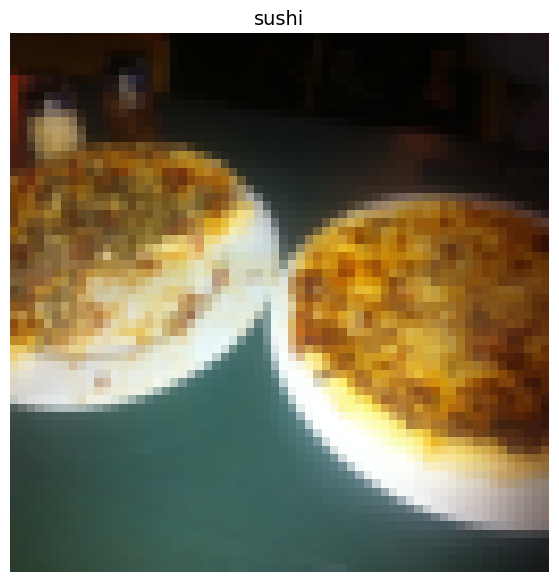

In [119]:
img_permute = img.permute(1,2,0)
print(f'orignal shape: {img.shape} -> [color_channels,height,width]')
print(f'new shape: {img_permute.shape} -> [height,width,colorchannels]')

plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.title(f'{image_class}',fontsize = 14)
plt.axis(False)

Create dataloaders
Dataloaders are going to help us turn our datasets into iterables and we can customize batch_size and shuffle the images.
If we looked at all images at once our memory would get flooded

In [120]:
import os
os.cpu_count()

2

In [121]:
from torch.utils.data import DataLoader

#num workers means how many cpu cores are assigned to running and opening data
train_dataloader = torch.utils.data.DataLoader(dataset = train_data,batch_size = 64,shuffle = True,num_workers =os.cpu_count() )
test_dataloader = torch.utils.data.DataLoader(dataset = train_data,batch_size = 64,shuffle = False,num_workers = os.cpu_count())
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ceb10bde990>,
 <torch.utils.data.dataloader.DataLoader at 0x7ceb109695b0>)

In [122]:
len(train_dataloader), len(test_dataloader)

(4, 4)

In [123]:
len(train_data),len(test_data)

(225, 75)

In [124]:
img,label = next(iter(train_dataloader))

print(f'image.shape :{img.shape}, -> [batchsize,color_channels,height,width]')
print(f'label shape : {label.shape}')

image.shape :torch.Size([64, 3, 64, 64]), -> [batchsize,color_channels,height,width]
label shape : torch.Size([64])


5 option 2: loading image data with a custom dataset

want to be able to laod images from file
want to be able to get class names froma dataset
want to be able to get classes as dictionary form dataset

pros:
can create a dataset out of thin air
not limited to pytorch pre built datasets funcitons


cons:
even though we could create a dataset, that doesnt mean it will work
must write more code, more prone to errors

In [125]:
import os
import pathlib
import torch
import PIL
import torch.utils.data.dataset

from torchvision import transforms

from typing import Tuple,Dict,List


#instance of torchvision.datasets.imagefolder()


train_data.classes,train_data.class_to_idx


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

create a helper function to get class names

we want a function to:

get the class names os.scandir(), to traverse a target directory.

raise a error if classnames arent found

turn the class names into a list and a dict and return them



In [126]:
target_directory = train_dir

print(f'target dir{target_directory}')





#get class names from the target directory


class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found






target dir/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [127]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
    """finds the class folder names in a target directory."""
    #get the class names from scanning the target directory

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())


    #Raise an error if class names couldnt be found
    if not classes:
        raise FileNotFoundError(f'No classes could be found in {directory}... please check file structure')


    #create dictoionary of index labels
    class_to_idx = {class_name: i for i,class_name in enumerate(classes)}
    return classes,class_to_idx

In [128]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Create Custom dataset to replicate image folder

to create our own custom dataset:
subclass torch.utils.data.Dataset
init our subclass with a target directory(the directory we will get the data from) as well as transform if wed like to transform out data

create dseveral attributes:
paths
transform
classes
classes to idx

we want to create a function to laod iamges
overwrite the len method to return the length of dataset
overwrite the getitem method to return a given sample when passed an index


In [129]:
#write a custom dataset

from torch.utils.data import Dataset
#subclass it

class ImageFolderCustom(Dataset):
    #intialise

    def __init__(self,targ_dir:str,transform = None):

    #create attributes
        self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

        self.transform = transform

        #create classes and class to idx

        self.classes,self.class_to_idx = find_classes(targ_dir)

    def load_image(self,index:int) -> Image.Image:
        """opens an image via a path and returns it"""
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self) -> int:
        """returns the number of samples"""
        return len(self.paths)

    #overwrite getitem

    def __getitem__(self, index:int)-> Tuple[torch.tensor,int]:

        """ returns one sample of data, data and label(X,y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        #transform if neccisary
        if self.transform:
            return self.transform(img),class_idx #return data,label(X,y)
        return img,class_idx




create transform


In [130]:
train_transforms = transforms.Compose([transforms.Resize(size = (64,64)),
                                       transforms.RandomHorizontalFlip(p = 0.5),
                                       transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize(size = (64,64)),
                                       transforms.ToTensor()])




In [131]:
train_data_custom = ImageFolderCustom(targ_dir =train_dir,transform=train_transforms,)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,transform= test_transforms)

In [132]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7ceaf735e570>,
 <__main__.ImageFolderCustom at 0x7ceb1096a7b0>)

In [133]:
len(train_data),len(train_data_custom)

(225, 225)

In [134]:
len(test_data), test_data_custom.__len__()

(75, 75)

In [135]:
train_data_custom.classes, test_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [136]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

check for equality  between original imagefolder dataset and the imagefoldercustomdataset



In [137]:
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


create a function to display random images
take in a dataset and a number of other parameters
to prevent the display gettin gout of hand lets cap the number of image to 10

set random seed
get list of random sample indexes from the target dataset

matplotlib plot

loop through random sample images and plot them with matplotlin

make sure the dimensions of our images line up with mPL(use permute)

In [138]:
import torch
import matplotlib.pyplot as plt
import random

def display_random_images(dataset, classes=None, n=5,display_shape = True, seed=None):
    # 1. Cap the number of images at 10 to keep the plot readable
    if n > 10:
        print("Capping display to 10 images for clarity.")
        n = 10

    # 2. Set random seed for reproducibility
    if seed:
        random.seed(seed)

    # 3. Get a list of random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), n)

    # 4. Setup the matplotlib figure
    plt.figure(figsize=(15, 8))

    # 5. Loop through indexes and plot
    for i, idx in enumerate(random_samples_idx):
        image, label = dataset[idx]

        # 6. Adjust dimensions using permute
        # PyTorch is (Color, Height, Width) -> MPL needs (Height, Width, Color)
        image_to_show = image.permute(1, 2, 0)

        plt.subplot(1, n, i + 1)
        plt.imshow(image_to_show)

        # Handle title (use class name if provided, else the raw label)
        title = classes[label] if classes else f"Label: {label}"
        if display_shape:
            title = title + f'\nshape:{image_to_show.shape}'
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

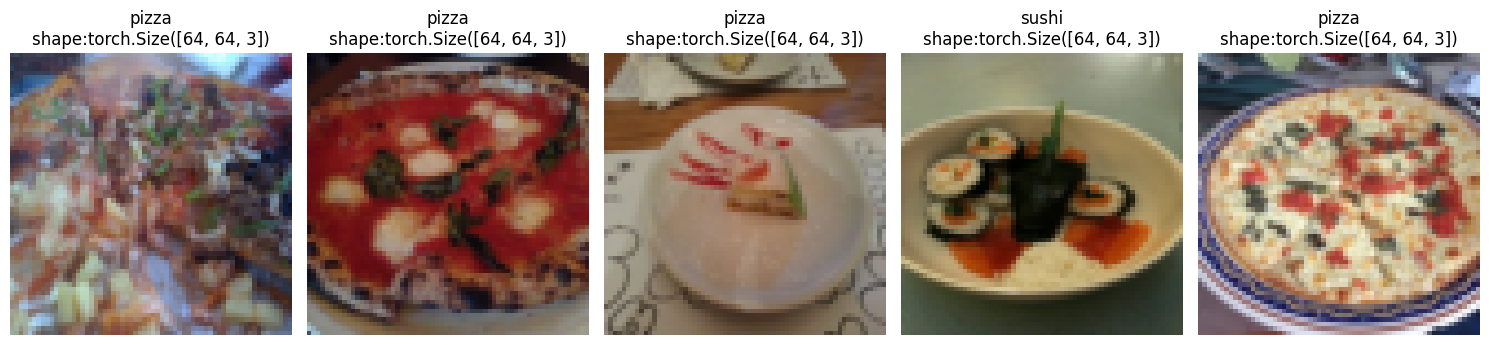

In [139]:
display_random_images(train_data,n=5,classes = class_names,seed = None)

display random images from the image foldercustom dataset

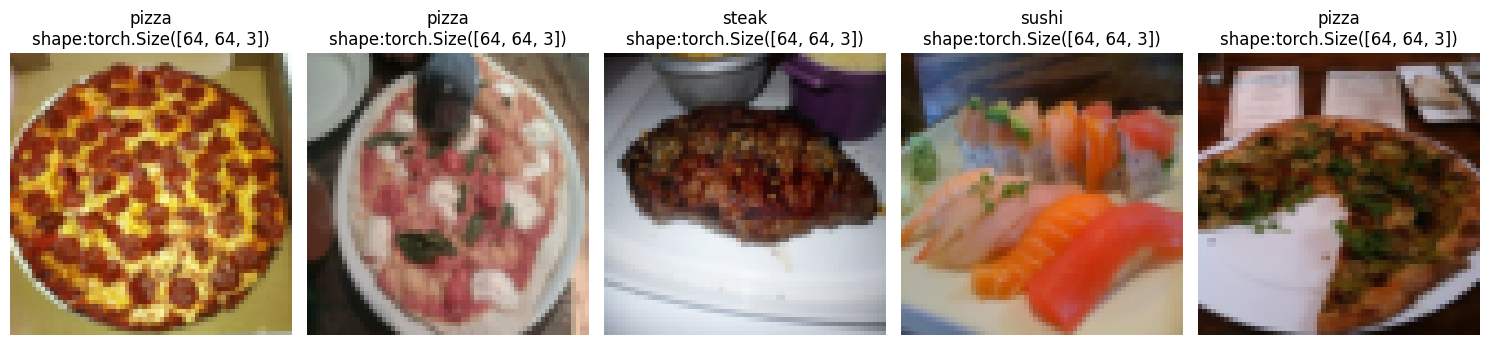

In [140]:
display_random_images(train_data_custom,n=5,classes = class_names,seed = None)

turn custom loaded images into dataloaders

In [141]:
from torch.utils.data import DataLoader

cores =0
BATCH_SIZE = 32
train_custom_dataloader = DataLoader(dataset=train_data_custom,batch_size= BATCH_SIZE,shuffle = True,num_workers = cores)
test_custom_dataloader = DataLoader(dataset=test_data_custom,batch_size= BATCH_SIZE,shuffle = False,num_workers = cores)

In [142]:
train_custom_dataloader,test_custom_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ceaf73aebd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ceaf730d8e0>)

In [143]:
img_custom,label_custom = next(iter(train_custom_dataloader))
img_custom.shape,label_custom.shape


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

other forms of data transforms(data augmentation):


data augmentation is the process of artificially adding diversity to your training data.
in the case of image data  this means applying varias image transformations to the training images

creates a model which is more generalised to unseen data

One particular type of data augmentation used to train pytorch vision models to state of the art levels...

In [144]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size = (224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])


test_transform = transforms.Compose([transforms.Resize(size = (224,224)),
                                     transforms.ToTensor()])




In [145]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/765684.jpg'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/385154.jpg'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/686426.jpg'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/1957449.jpg'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/3004029.jpg'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/1221830.jpg'),
 PosixPath('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files/data/pizza_steak_sushi/train/sushi/748830.jpg'),
 PosixPath('/Users/haydenfletch

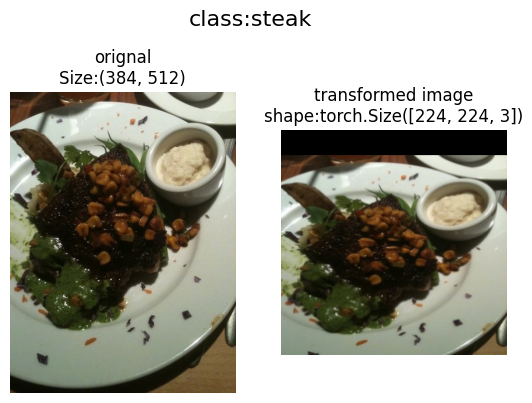

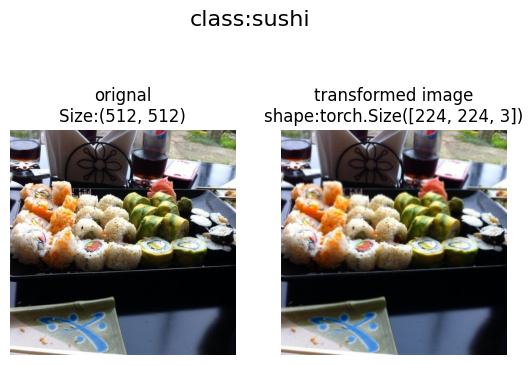

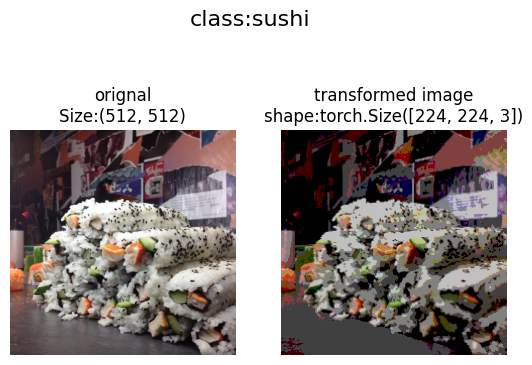

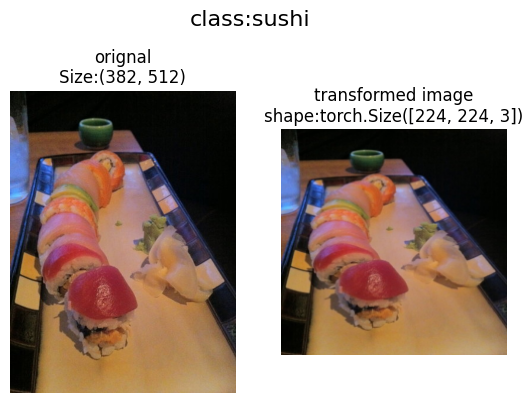

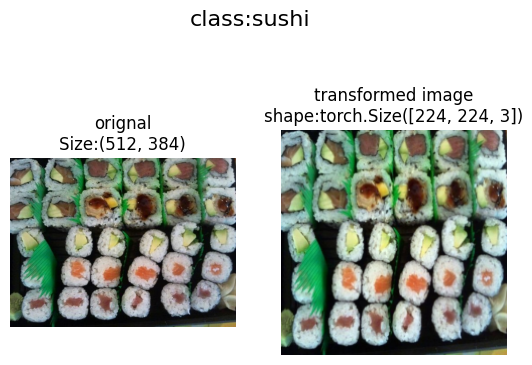

In [146]:
#plot random images

plot_transformed_images(image_paths=image_path_list,transform = train_transform,n=5,seed =random.randint(1,1000))

Model0: TinyVGG wiithout data augmentation

In [184]:

#replicate Tiny VGG architecture from CNN explainer website : https://poloclub.github.io/cnn-explainer/

simple_transform = transforms.Compose([transforms.Resize(size =(64,64)),
                                    transforms.ToTensor()])


#load data


from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,transform= simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,transform= simple_transform)



import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_loader_simple = torch.utils.data.DataLoader(dataset = train_data_simple,batch_size = BATCH_SIZE, shuffle = True, num_workers = NUM_WORKERS)
test_loader_simple = torch.utils.data.DataLoader(dataset = test_data_simple,batch_size = BATCH_SIZE, shuffle = False, num_workers = NUM_WORKERS)





create tiny vgg architecture

In [148]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion



In [152]:
# 1. Get a sample
torch.manual_seed(42)
images, labels = next(iter(train_loader_simple))

# 2. Setup parameters
features = images.shape[1] # This will be 3 for RGB

# 3. Initialize model (Line 10 - Correct)
tinymodel = TinyVGG(input_shape=features,
                     output_shape=len(class_names),
                     hidden_units=10).to(device)

# 4. Pass data through
output = tinymodel(images.to(device))
import sys
!pip install torchinfo
import torchinfo
from torchinfo import summary


summary(tinymodel, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

create train and test loops functions

train_step=takes in a model and dataloader and trains the model on the dataloader
test_step = takes in a model and dataloader and evals the model on the dataloader

In [149]:
import tqdm

def train_step(model:torch.nn.Module,dataloader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,device = device):


    model.train()

    train_loss,train_acc = 0,0


    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        y_pred = model(X)
        #calculate the loss
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1), dim = 1)

        train_acc += (y_pred_class == y).sum().item()/len(y_pred)



    train_acc /= len(dataloader)
    train_loss /= len(dataloader)
    return train_acc, train_loss

def test_step(model:torch.nn.Module,dataloader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,device = device):
    model.eval()

    test_loss = 0
    test_acc = 0
    total_samples = len(dataloader.dataset)
    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred,y)
            test_loss += loss.item()
            y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1), dim = 1)

            test_acc += (y_pred_class == y).sum().item()/len(y_pred)
        test_acc /= len(dataloader)
        test_loss /= len(dataloader)

    return test_acc,test_loss







In [150]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """prints difference between start and end time."""
    total_time = end - start
    print(f'Training time on {device}: {total_time:.3f} seconds')
    return total_time

do train and test loop

In [153]:
from timeit import default_timer as timer

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device):

    torch.manual_seed(42)
    start_time = timer()

    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in tqdm.tqdm(range(epochs)):
        # Use the arguments passed into the function (model, train_dataloader, etc.)
        train_acc, train_loss = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_acc, test_loss = test_step(model=model,
                                         dataloader=test_dataloader,
                                         loss_fn=loss_fn,
                                         device=device)

        print(
            f"Epoch: {epoch} | "
            f"train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    end_time = timer()
    print(f"Total training time: {end_time - start_time:.3f} seconds")
    return results

evaluate model

In [196]:
# Set random seeds
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 100

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_loader_simple,
                        test_dataloader=test_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,device = device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  1%|          | 1/100 [00:00<01:26,  1.15it/s]

Epoch: 0 | train_loss: 1.1071 | train_acc: 0.2500 | test_loss: 1.1061 | test_acc: 0.2604


  2%|▏         | 2/100 [00:01<01:24,  1.16it/s]

Epoch: 1 | train_loss: 1.0784 | train_acc: 0.4258 | test_loss: 1.1397 | test_acc: 0.2604


  3%|▎         | 3/100 [00:02<01:23,  1.16it/s]

Epoch: 2 | train_loss: 1.0804 | train_acc: 0.4258 | test_loss: 1.1700 | test_acc: 0.2604


  4%|▍         | 4/100 [00:03<01:22,  1.16it/s]

Epoch: 3 | train_loss: 1.1277 | train_acc: 0.3047 | test_loss: 1.1563 | test_acc: 0.2604


  5%|▌         | 5/100 [00:04<01:21,  1.16it/s]

Epoch: 4 | train_loss: 1.0891 | train_acc: 0.4258 | test_loss: 1.1431 | test_acc: 0.2604


  6%|▌         | 6/100 [00:05<01:20,  1.17it/s]

Epoch: 5 | train_loss: 1.0968 | train_acc: 0.3047 | test_loss: 1.1442 | test_acc: 0.2604


  7%|▋         | 7/100 [00:06<01:19,  1.17it/s]

Epoch: 6 | train_loss: 1.0913 | train_acc: 0.4570 | test_loss: 1.1491 | test_acc: 0.1979


  8%|▊         | 8/100 [00:06<01:18,  1.16it/s]

Epoch: 7 | train_loss: 1.0999 | train_acc: 0.2930 | test_loss: 1.1512 | test_acc: 0.1979


  9%|▉         | 9/100 [00:07<01:17,  1.17it/s]

Epoch: 8 | train_loss: 1.1187 | train_acc: 0.2930 | test_loss: 1.1352 | test_acc: 0.2500


 10%|█         | 10/100 [00:08<01:21,  1.10it/s]

Epoch: 9 | train_loss: 1.1198 | train_acc: 0.3789 | test_loss: 1.0821 | test_acc: 0.4839


 11%|█         | 11/100 [00:10<01:35,  1.08s/it]

Epoch: 10 | train_loss: 1.0469 | train_acc: 0.6094 | test_loss: 1.0987 | test_acc: 0.3428


 12%|█▏        | 12/100 [00:11<01:32,  1.06s/it]

Epoch: 11 | train_loss: 1.0239 | train_acc: 0.5469 | test_loss: 1.0545 | test_acc: 0.4129


 13%|█▎        | 13/100 [00:12<01:26,  1.00it/s]

Epoch: 12 | train_loss: 1.0015 | train_acc: 0.5664 | test_loss: 1.0132 | test_acc: 0.5246


 14%|█▍        | 14/100 [00:12<01:22,  1.04it/s]

Epoch: 13 | train_loss: 0.8997 | train_acc: 0.6094 | test_loss: 1.0558 | test_acc: 0.4233


 15%|█▌        | 15/100 [00:13<01:18,  1.08it/s]

Epoch: 14 | train_loss: 0.9518 | train_acc: 0.5117 | test_loss: 1.0995 | test_acc: 0.3731


 16%|█▌        | 16/100 [00:14<01:15,  1.11it/s]

Epoch: 15 | train_loss: 0.7865 | train_acc: 0.6484 | test_loss: 1.1292 | test_acc: 0.3835


 17%|█▋        | 17/100 [00:15<01:14,  1.12it/s]

Epoch: 16 | train_loss: 0.8334 | train_acc: 0.6367 | test_loss: 1.1061 | test_acc: 0.3930


 18%|█▊        | 18/100 [00:16<01:12,  1.14it/s]

Epoch: 17 | train_loss: 0.7529 | train_acc: 0.6484 | test_loss: 1.0865 | test_acc: 0.4545


 19%|█▉        | 19/100 [00:17<01:10,  1.15it/s]

Epoch: 18 | train_loss: 0.7154 | train_acc: 0.6641 | test_loss: 1.1032 | test_acc: 0.5161


 20%|██        | 20/100 [00:18<01:09,  1.15it/s]

Epoch: 19 | train_loss: 0.7926 | train_acc: 0.5742 | test_loss: 1.0853 | test_acc: 0.4347


 21%|██        | 21/100 [00:18<01:08,  1.16it/s]

Epoch: 20 | train_loss: 0.7161 | train_acc: 0.7344 | test_loss: 1.0890 | test_acc: 0.4848


 22%|██▏       | 22/100 [00:19<01:07,  1.16it/s]

Epoch: 21 | train_loss: 0.8658 | train_acc: 0.5000 | test_loss: 0.9534 | test_acc: 0.5568


 23%|██▎       | 23/100 [00:20<01:05,  1.17it/s]

Epoch: 22 | train_loss: 0.6808 | train_acc: 0.7188 | test_loss: 0.9935 | test_acc: 0.5047


 24%|██▍       | 24/100 [00:22<01:18,  1.03s/it]

Epoch: 23 | train_loss: 0.7235 | train_acc: 0.6133 | test_loss: 1.0200 | test_acc: 0.4839


 25%|██▌       | 25/100 [00:23<01:20,  1.08s/it]

Epoch: 24 | train_loss: 0.6473 | train_acc: 0.7461 | test_loss: 1.0235 | test_acc: 0.5152


 26%|██▌       | 26/100 [00:24<01:14,  1.01s/it]

Epoch: 25 | train_loss: 0.7110 | train_acc: 0.6016 | test_loss: 1.0907 | test_acc: 0.3930


 27%|██▋       | 27/100 [00:24<01:10,  1.03it/s]

Epoch: 26 | train_loss: 0.6671 | train_acc: 0.7578 | test_loss: 1.0888 | test_acc: 0.4451


 28%|██▊       | 28/100 [00:25<01:07,  1.07it/s]

Epoch: 27 | train_loss: 0.6058 | train_acc: 0.7812 | test_loss: 1.0471 | test_acc: 0.4848


 29%|██▉       | 29/100 [00:26<01:04,  1.10it/s]

Epoch: 28 | train_loss: 0.6356 | train_acc: 0.6797 | test_loss: 1.0365 | test_acc: 0.5161


 30%|███       | 30/100 [00:27<01:02,  1.12it/s]

Epoch: 29 | train_loss: 0.5578 | train_acc: 0.8125 | test_loss: 1.0572 | test_acc: 0.4858


 31%|███       | 31/100 [00:28<01:00,  1.14it/s]

Epoch: 30 | train_loss: 0.5100 | train_acc: 0.7930 | test_loss: 1.1325 | test_acc: 0.4242


 32%|███▏      | 32/100 [00:29<01:01,  1.11it/s]

Epoch: 31 | train_loss: 0.4712 | train_acc: 0.8086 | test_loss: 1.2797 | test_acc: 0.4659


 33%|███▎      | 33/100 [00:30<00:59,  1.13it/s]

Epoch: 32 | train_loss: 0.4425 | train_acc: 0.8047 | test_loss: 1.2101 | test_acc: 0.4848


 34%|███▍      | 34/100 [00:31<00:59,  1.10it/s]

Epoch: 33 | train_loss: 0.5574 | train_acc: 0.7227 | test_loss: 1.4143 | test_acc: 0.4252


 35%|███▌      | 35/100 [00:31<00:57,  1.12it/s]

Epoch: 34 | train_loss: 0.7253 | train_acc: 0.6758 | test_loss: 1.1315 | test_acc: 0.4953


 36%|███▌      | 36/100 [00:32<00:56,  1.14it/s]

Epoch: 35 | train_loss: 0.8027 | train_acc: 0.6094 | test_loss: 1.2680 | test_acc: 0.5360


 37%|███▋      | 37/100 [00:33<00:59,  1.05it/s]

Epoch: 36 | train_loss: 0.6562 | train_acc: 0.8086 | test_loss: 1.1736 | test_acc: 0.4527


 38%|███▊      | 38/100 [00:35<01:07,  1.09s/it]

Epoch: 37 | train_loss: 0.4591 | train_acc: 0.8711 | test_loss: 1.1643 | test_acc: 0.4545


 39%|███▉      | 39/100 [00:36<01:03,  1.04s/it]

Epoch: 38 | train_loss: 0.3969 | train_acc: 0.8828 | test_loss: 1.2352 | test_acc: 0.4650


 40%|████      | 40/100 [00:37<00:59,  1.01it/s]

Epoch: 39 | train_loss: 0.4810 | train_acc: 0.7500 | test_loss: 1.3244 | test_acc: 0.4848


 41%|████      | 41/100 [00:38<00:56,  1.05it/s]

Epoch: 40 | train_loss: 0.3999 | train_acc: 0.8633 | test_loss: 1.4338 | test_acc: 0.4962


 42%|████▏     | 42/100 [00:38<00:53,  1.09it/s]

Epoch: 41 | train_loss: 0.3912 | train_acc: 0.8945 | test_loss: 1.3881 | test_acc: 0.5265


 43%|████▎     | 43/100 [00:39<00:51,  1.11it/s]

Epoch: 42 | train_loss: 0.3420 | train_acc: 0.8672 | test_loss: 1.3723 | test_acc: 0.5369


 44%|████▍     | 44/100 [00:40<00:49,  1.12it/s]

Epoch: 43 | train_loss: 0.2564 | train_acc: 0.9180 | test_loss: 1.5347 | test_acc: 0.4441


 45%|████▌     | 45/100 [00:41<00:48,  1.13it/s]

Epoch: 44 | train_loss: 0.2344 | train_acc: 0.9219 | test_loss: 1.5721 | test_acc: 0.4754


 46%|████▌     | 46/100 [00:42<00:47,  1.14it/s]

Epoch: 45 | train_loss: 0.2032 | train_acc: 0.9336 | test_loss: 1.5842 | test_acc: 0.4754


 47%|████▋     | 47/100 [00:43<00:46,  1.15it/s]

Epoch: 46 | train_loss: 0.1865 | train_acc: 0.9453 | test_loss: 1.6346 | test_acc: 0.4858


 48%|████▊     | 48/100 [00:44<00:44,  1.17it/s]

Epoch: 47 | train_loss: 0.2050 | train_acc: 0.9570 | test_loss: 1.8648 | test_acc: 0.4650


 49%|████▉     | 49/100 [00:44<00:43,  1.17it/s]

Epoch: 48 | train_loss: 0.1834 | train_acc: 0.9453 | test_loss: 1.8195 | test_acc: 0.4754


 50%|█████     | 50/100 [00:45<00:43,  1.16it/s]

Epoch: 49 | train_loss: 0.1621 | train_acc: 0.9531 | test_loss: 2.0243 | test_acc: 0.4441


 51%|█████     | 51/100 [00:47<00:50,  1.03s/it]

Epoch: 50 | train_loss: 0.2068 | train_acc: 0.9688 | test_loss: 2.0098 | test_acc: 0.4441


 52%|█████▏    | 52/100 [00:48<00:51,  1.08s/it]

Epoch: 51 | train_loss: 0.1971 | train_acc: 0.9102 | test_loss: 1.9676 | test_acc: 0.5152


 53%|█████▎    | 53/100 [00:49<00:47,  1.01s/it]

Epoch: 52 | train_loss: 0.1798 | train_acc: 0.9414 | test_loss: 2.1477 | test_acc: 0.4034


 54%|█████▍    | 54/100 [00:50<00:44,  1.04it/s]

Epoch: 53 | train_loss: 0.1805 | train_acc: 0.9414 | test_loss: 2.0361 | test_acc: 0.5360


 55%|█████▌    | 55/100 [00:51<00:48,  1.07s/it]

Epoch: 54 | train_loss: 0.1588 | train_acc: 0.9414 | test_loss: 2.2374 | test_acc: 0.4545


 56%|█████▌    | 56/100 [00:52<00:44,  1.01s/it]

Epoch: 55 | train_loss: 0.1302 | train_acc: 0.9648 | test_loss: 2.1168 | test_acc: 0.4545


 57%|█████▋    | 57/100 [00:53<00:41,  1.04it/s]

Epoch: 56 | train_loss: 0.1125 | train_acc: 0.9844 | test_loss: 2.2320 | test_acc: 0.4138


 58%|█████▊    | 58/100 [00:53<00:39,  1.07it/s]

Epoch: 57 | train_loss: 0.1145 | train_acc: 0.9609 | test_loss: 2.2363 | test_acc: 0.4953


 59%|█████▉    | 59/100 [00:54<00:37,  1.10it/s]

Epoch: 58 | train_loss: 0.0919 | train_acc: 0.9805 | test_loss: 2.2938 | test_acc: 0.4337


 60%|██████    | 60/100 [00:55<00:35,  1.12it/s]

Epoch: 59 | train_loss: 0.0628 | train_acc: 0.9922 | test_loss: 2.2725 | test_acc: 0.5057


 61%|██████    | 61/100 [00:56<00:34,  1.14it/s]

Epoch: 60 | train_loss: 0.0711 | train_acc: 0.9883 | test_loss: 2.3945 | test_acc: 0.4441


 62%|██████▏   | 62/100 [00:57<00:33,  1.15it/s]

Epoch: 61 | train_loss: 0.0565 | train_acc: 0.9922 | test_loss: 2.4869 | test_acc: 0.4545


 63%|██████▎   | 63/100 [00:58<00:32,  1.12it/s]

Epoch: 62 | train_loss: 0.0626 | train_acc: 0.9883 | test_loss: 2.5939 | test_acc: 0.4545


 64%|██████▍   | 64/100 [00:59<00:37,  1.04s/it]

Epoch: 63 | train_loss: 0.0866 | train_acc: 0.9844 | test_loss: 2.5311 | test_acc: 0.4337


 65%|██████▌   | 65/100 [01:00<00:38,  1.10s/it]

Epoch: 64 | train_loss: 0.0982 | train_acc: 0.9648 | test_loss: 2.7645 | test_acc: 0.4129


 66%|██████▌   | 66/100 [01:01<00:35,  1.03s/it]

Epoch: 65 | train_loss: 0.0899 | train_acc: 0.9805 | test_loss: 2.7347 | test_acc: 0.4848


 67%|██████▋   | 67/100 [01:02<00:32,  1.02it/s]

Epoch: 66 | train_loss: 0.0907 | train_acc: 0.9570 | test_loss: 2.9086 | test_acc: 0.4034


 68%|██████▊   | 68/100 [01:03<00:30,  1.06it/s]

Epoch: 67 | train_loss: 0.0655 | train_acc: 0.9844 | test_loss: 2.8248 | test_acc: 0.4545


 69%|██████▉   | 69/100 [01:04<00:28,  1.07it/s]

Epoch: 68 | train_loss: 0.0506 | train_acc: 0.9844 | test_loss: 2.9307 | test_acc: 0.4441


 70%|███████   | 70/100 [01:05<00:27,  1.10it/s]

Epoch: 69 | train_loss: 0.0371 | train_acc: 0.9922 | test_loss: 3.0405 | test_acc: 0.4233


 71%|███████   | 71/100 [01:06<00:25,  1.12it/s]

Epoch: 70 | train_loss: 0.0277 | train_acc: 0.9961 | test_loss: 2.8759 | test_acc: 0.4640


 72%|███████▏  | 72/100 [01:07<00:24,  1.13it/s]

Epoch: 71 | train_loss: 0.0242 | train_acc: 1.0000 | test_loss: 3.0231 | test_acc: 0.4233


 73%|███████▎  | 73/100 [01:07<00:23,  1.14it/s]

Epoch: 72 | train_loss: 0.0271 | train_acc: 0.9961 | test_loss: 3.1577 | test_acc: 0.4233


 74%|███████▍  | 74/100 [01:08<00:22,  1.15it/s]

Epoch: 73 | train_loss: 0.0206 | train_acc: 1.0000 | test_loss: 3.0645 | test_acc: 0.4545


 75%|███████▌  | 75/100 [01:09<00:21,  1.16it/s]

Epoch: 74 | train_loss: 0.0177 | train_acc: 1.0000 | test_loss: 3.2580 | test_acc: 0.4441


 76%|███████▌  | 76/100 [01:10<00:20,  1.17it/s]

Epoch: 75 | train_loss: 0.0166 | train_acc: 1.0000 | test_loss: 3.1981 | test_acc: 0.4337


 77%|███████▋  | 77/100 [01:11<00:21,  1.06it/s]

Epoch: 76 | train_loss: 0.0127 | train_acc: 1.0000 | test_loss: 3.2279 | test_acc: 0.4441


 78%|███████▊  | 78/100 [01:12<00:23,  1.08s/it]

Epoch: 77 | train_loss: 0.0399 | train_acc: 1.0000 | test_loss: 3.2818 | test_acc: 0.4337


 79%|███████▉  | 79/100 [01:13<00:21,  1.04s/it]

Epoch: 78 | train_loss: 0.0643 | train_acc: 0.9727 | test_loss: 3.5971 | test_acc: 0.4337


 80%|████████  | 80/100 [01:14<00:19,  1.01it/s]

Epoch: 79 | train_loss: 0.0450 | train_acc: 0.9844 | test_loss: 3.1736 | test_acc: 0.4953


 81%|████████  | 81/100 [01:15<00:17,  1.06it/s]

Epoch: 80 | train_loss: 0.0223 | train_acc: 1.0000 | test_loss: 3.3622 | test_acc: 0.4441


 82%|████████▏ | 82/100 [01:16<00:16,  1.09it/s]

Epoch: 81 | train_loss: 0.0125 | train_acc: 1.0000 | test_loss: 3.5169 | test_acc: 0.4233


 83%|████████▎ | 83/100 [01:17<00:15,  1.11it/s]

Epoch: 82 | train_loss: 0.0123 | train_acc: 1.0000 | test_loss: 3.5491 | test_acc: 0.4233


 84%|████████▍ | 84/100 [01:18<00:14,  1.13it/s]

Epoch: 83 | train_loss: 0.0150 | train_acc: 1.0000 | test_loss: 3.5107 | test_acc: 0.4337


 85%|████████▌ | 85/100 [01:19<00:13,  1.14it/s]

Epoch: 84 | train_loss: 0.0099 | train_acc: 1.0000 | test_loss: 3.5468 | test_acc: 0.4441


 86%|████████▌ | 86/100 [01:19<00:12,  1.15it/s]

Epoch: 85 | train_loss: 0.0096 | train_acc: 1.0000 | test_loss: 3.6887 | test_acc: 0.4337


 87%|████████▋ | 87/100 [01:20<00:11,  1.16it/s]

Epoch: 86 | train_loss: 0.0070 | train_acc: 1.0000 | test_loss: 3.6011 | test_acc: 0.4545


 88%|████████▊ | 88/100 [01:21<00:10,  1.16it/s]

Epoch: 87 | train_loss: 0.0058 | train_acc: 1.0000 | test_loss: 3.5649 | test_acc: 0.4545


 89%|████████▉ | 89/100 [01:22<00:09,  1.16it/s]

Epoch: 88 | train_loss: 0.0056 | train_acc: 1.0000 | test_loss: 3.6173 | test_acc: 0.4545


 90%|█████████ | 90/100 [01:23<00:08,  1.14it/s]

Epoch: 89 | train_loss: 0.0053 | train_acc: 1.0000 | test_loss: 3.6994 | test_acc: 0.4337


 91%|█████████ | 91/100 [01:24<00:09,  1.02s/it]

Epoch: 90 | train_loss: 0.0048 | train_acc: 1.0000 | test_loss: 3.6862 | test_acc: 0.4545


 92%|█████████▏| 92/100 [01:25<00:08,  1.08s/it]

Epoch: 91 | train_loss: 0.0085 | train_acc: 1.0000 | test_loss: 3.7609 | test_acc: 0.4441


 93%|█████████▎| 93/100 [01:26<00:07,  1.01s/it]

Epoch: 92 | train_loss: 0.0047 | train_acc: 1.0000 | test_loss: 3.8270 | test_acc: 0.4441


 94%|█████████▍| 94/100 [01:27<00:05,  1.04it/s]

Epoch: 93 | train_loss: 0.0047 | train_acc: 1.0000 | test_loss: 3.7586 | test_acc: 0.4545


 95%|█████████▌| 95/100 [01:28<00:04,  1.08it/s]

Epoch: 94 | train_loss: 0.0041 | train_acc: 1.0000 | test_loss: 3.7923 | test_acc: 0.4545


 96%|█████████▌| 96/100 [01:29<00:03,  1.11it/s]

Epoch: 95 | train_loss: 0.0042 | train_acc: 1.0000 | test_loss: 3.8703 | test_acc: 0.4441


 97%|█████████▋| 97/100 [01:30<00:02,  1.10it/s]

Epoch: 96 | train_loss: 0.0058 | train_acc: 1.0000 | test_loss: 3.8634 | test_acc: 0.4441


 98%|█████████▊| 98/100 [01:31<00:01,  1.11it/s]

Epoch: 97 | train_loss: 0.0034 | train_acc: 1.0000 | test_loss: 3.7560 | test_acc: 0.4848


 99%|█████████▉| 99/100 [01:31<00:00,  1.13it/s]

Epoch: 98 | train_loss: 0.0084 | train_acc: 1.0000 | test_loss: 3.9719 | test_acc: 0.4441


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]

Epoch: 99 | train_loss: 0.0082 | train_acc: 1.0000 | test_loss: 4.1047 | test_acc: 0.4337
Total training time: 92.830 seconds
Total training time: 92.831 seconds


plot a loss curve

In [197]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [198]:
def plot_loss_curves(results:Dict[str,List[float]]):
    #get loss values of results dictionary

    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_acc= results['test_acc']


    epochs = range(len(results['train_loss']))

    plt.figure(figsize = (15,7))


    #plot the loss

    plt.subplot(1,2,1)

    plt.plot(epochs,loss,label = 'train_loss')
    plt.plot(epochs,test_loss,label = 'test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()


    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy, label = 'train_accuracy')
    plt.plot(epochs,test_acc,label = 'test_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()



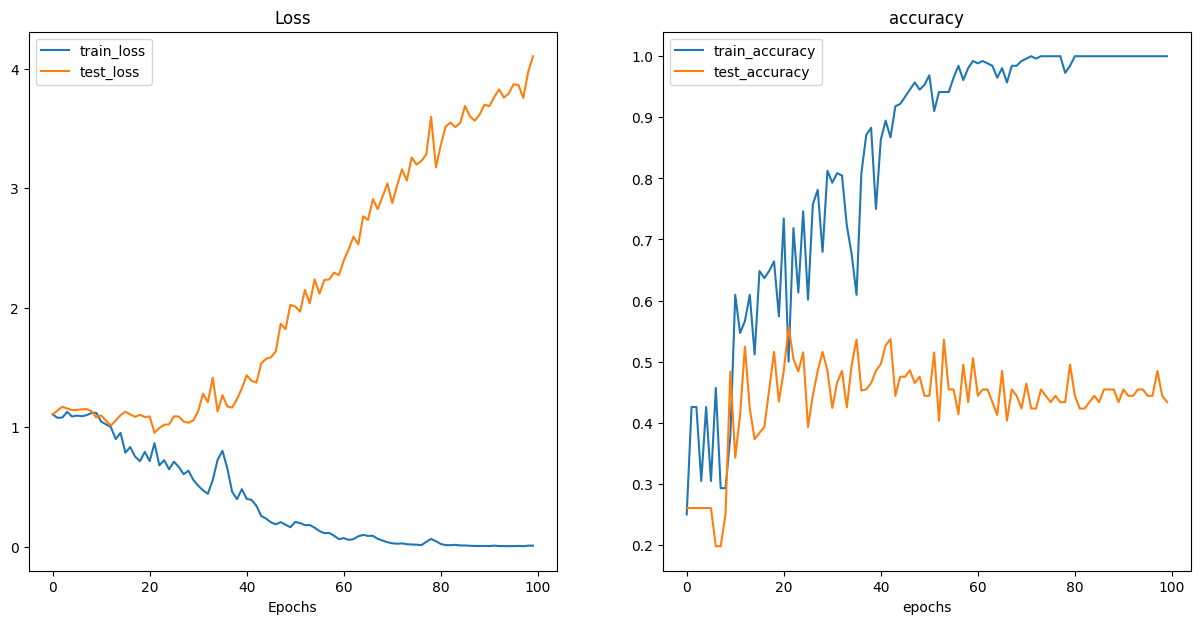

In [199]:
plot_loss_curves(model_0_results)

what should a ideal loss curve look like:

should come from top left to bottom right
for accuracy: should go from bottom left to top right

underfitting:loss could be lower
overfitting: train lower than test
just right: train and test are similar

to get over overfitting is to:
get more data
data augmentation
better data
transfer learning
simplify model
learning rate decay
early stopping

to get over underfitting:
add more layers
tweak learning rate
train for longer
transfer learning
less regularization

dealing with overfitting

In [159]:
#now lets use augmentation
from torchvision import transforms
train_transform_trivial = transforms.Compose([
                    transforms.Resize(size = (64,64)),
                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                    transforms.ToTensor()])
test_transform_simple = transforms.Compose([
                    transforms.Resize(size = (64,64)),

                    transforms.ToTensor()])





create train,test datasets and loader with data augmentation

In [160]:
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root = train_dir,transform=  train_transform_trivial)
test_data_simple= datasets.ImageFolder(root = test_dir,transform = test_transform_simple)





In [161]:
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented= torch.utils.data.DataLoader(batch_size = BATCH_SIZE, shuffle = True,num_workers=NUM_WORKERS,dataset=train_data_augmented)


test_dataloader_simple = torch.utils.data.DataLoader(batch_size = BATCH_SIZE, shuffle = False,num_workers=NUM_WORKERS,dataset=test_data_simple)



In [207]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


model_1 = TinyVGG(input_shape=3,hidden_units=10,output_shape = len(train_data.classes)).to(device)
model_1


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lr = 0.0001,params = model_1.parameters(),weight_decay=0.01)

from timeit import default_timer as timer
start_time = timer()
NUM_EPOCHS = 100
model_1_results = train(model = model_1,loss_fn = loss_fn,optimizer = optimizer,device = device,train_dataloader =train_dataloader_augmented,test_dataloader = test_dataloader_simple,epochs = NUM_EPOCHS )
end_time = timer()

print(f'for {NUM_EPOCHS} epochs it took {end_time-start_time}')

model_1_results

  1%|          | 1/100 [00:00<01:37,  1.01it/s]

Epoch: 0 | train_loss: 1.0992 | train_acc: 0.3094 | test_loss: 1.1012 | test_acc: 0.1484


  2%|▏         | 2/100 [00:01<01:33,  1.05it/s]

Epoch: 1 | train_loss: 1.0983 | train_acc: 0.3214 | test_loss: 1.1056 | test_acc: 0.1953


  3%|▎         | 3/100 [00:02<01:31,  1.06it/s]

Epoch: 2 | train_loss: 1.0979 | train_acc: 0.3595 | test_loss: 1.1119 | test_acc: 0.1953


  4%|▍         | 4/100 [00:03<01:30,  1.06it/s]

Epoch: 3 | train_loss: 1.0976 | train_acc: 0.3524 | test_loss: 1.1167 | test_acc: 0.1953


  5%|▌         | 5/100 [00:04<01:29,  1.06it/s]

Epoch: 4 | train_loss: 1.0983 | train_acc: 0.3451 | test_loss: 1.1219 | test_acc: 0.1953


  6%|▌         | 6/100 [00:05<01:27,  1.07it/s]

Epoch: 5 | train_loss: 1.0975 | train_acc: 0.3524 | test_loss: 1.1241 | test_acc: 0.1953


  7%|▋         | 7/100 [00:06<01:26,  1.08it/s]

Epoch: 6 | train_loss: 1.0977 | train_acc: 0.3487 | test_loss: 1.1247 | test_acc: 0.1953


  8%|▊         | 8/100 [00:07<01:25,  1.08it/s]

Epoch: 7 | train_loss: 1.0969 | train_acc: 0.3597 | test_loss: 1.1253 | test_acc: 0.1953


  9%|▉         | 9/100 [00:08<01:24,  1.08it/s]

Epoch: 8 | train_loss: 1.1002 | train_acc: 0.3340 | test_loss: 1.1270 | test_acc: 0.1953


 10%|█         | 10/100 [00:09<01:30,  1.01s/it]

Epoch: 9 | train_loss: 1.0974 | train_acc: 0.3561 | test_loss: 1.1236 | test_acc: 0.1953


 11%|█         | 11/100 [00:11<01:42,  1.15s/it]

Epoch: 10 | train_loss: 1.0977 | train_acc: 0.3524 | test_loss: 1.1210 | test_acc: 0.1953


 12%|█▏        | 12/100 [00:12<01:37,  1.10s/it]

Epoch: 11 | train_loss: 1.0972 | train_acc: 0.3524 | test_loss: 1.1175 | test_acc: 0.1953


 13%|█▎        | 13/100 [00:13<01:31,  1.05s/it]

Epoch: 12 | train_loss: 1.0980 | train_acc: 0.3487 | test_loss: 1.1147 | test_acc: 0.1953


 14%|█▍        | 14/100 [00:13<01:27,  1.01s/it]

Epoch: 13 | train_loss: 1.0972 | train_acc: 0.3524 | test_loss: 1.1149 | test_acc: 0.1953


 15%|█▌        | 15/100 [00:14<01:24,  1.01it/s]

Epoch: 14 | train_loss: 1.0988 | train_acc: 0.3377 | test_loss: 1.1148 | test_acc: 0.1953


 16%|█▌        | 16/100 [00:15<01:21,  1.03it/s]

Epoch: 15 | train_loss: 1.0971 | train_acc: 0.3561 | test_loss: 1.1135 | test_acc: 0.1953


 17%|█▋        | 17/100 [00:16<01:19,  1.04it/s]

Epoch: 16 | train_loss: 1.0976 | train_acc: 0.3451 | test_loss: 1.1147 | test_acc: 0.1953


 18%|█▊        | 18/100 [00:17<01:17,  1.05it/s]

Epoch: 17 | train_loss: 1.0978 | train_acc: 0.3414 | test_loss: 1.1145 | test_acc: 0.1953


 19%|█▉        | 19/100 [00:18<01:16,  1.06it/s]

Epoch: 18 | train_loss: 1.0983 | train_acc: 0.3340 | test_loss: 1.1165 | test_acc: 0.1953


 20%|██        | 20/100 [00:19<01:14,  1.07it/s]

Epoch: 19 | train_loss: 1.0972 | train_acc: 0.3414 | test_loss: 1.1157 | test_acc: 0.1953


 21%|██        | 21/100 [00:20<01:13,  1.07it/s]

Epoch: 20 | train_loss: 1.0967 | train_acc: 0.3634 | test_loss: 1.1155 | test_acc: 0.1953


 22%|██▏       | 22/100 [00:21<01:14,  1.05it/s]

Epoch: 21 | train_loss: 1.0982 | train_acc: 0.3340 | test_loss: 1.1169 | test_acc: 0.1953


 23%|██▎       | 23/100 [00:22<01:26,  1.12s/it]

Epoch: 22 | train_loss: 1.0959 | train_acc: 0.3561 | test_loss: 1.1152 | test_acc: 0.1953


 24%|██▍       | 24/100 [00:24<01:25,  1.13s/it]

Epoch: 23 | train_loss: 1.0961 | train_acc: 0.3414 | test_loss: 1.1155 | test_acc: 0.1953


 25%|██▌       | 25/100 [00:25<01:37,  1.30s/it]

Epoch: 24 | train_loss: 1.0949 | train_acc: 0.3487 | test_loss: 1.1146 | test_acc: 0.1953


 26%|██▌       | 26/100 [00:26<01:28,  1.20s/it]

Epoch: 25 | train_loss: 1.0964 | train_acc: 0.3377 | test_loss: 1.1176 | test_acc: 0.1953


 27%|██▋       | 27/100 [00:27<01:21,  1.12s/it]

Epoch: 26 | train_loss: 1.0947 | train_acc: 0.3482 | test_loss: 1.1175 | test_acc: 0.1953


 28%|██▊       | 28/100 [00:28<01:16,  1.06s/it]

Epoch: 27 | train_loss: 1.0954 | train_acc: 0.3375 | test_loss: 1.1178 | test_acc: 0.1953


 29%|██▉       | 29/100 [00:29<01:12,  1.02s/it]

Epoch: 28 | train_loss: 1.0963 | train_acc: 0.3304 | test_loss: 1.1158 | test_acc: 0.1953


 30%|███       | 30/100 [00:30<01:09,  1.00it/s]

Epoch: 29 | train_loss: 1.0939 | train_acc: 0.3343 | test_loss: 1.1123 | test_acc: 0.1953


 31%|███       | 31/100 [00:31<01:07,  1.02it/s]

Epoch: 30 | train_loss: 1.0932 | train_acc: 0.3494 | test_loss: 1.1128 | test_acc: 0.2031


 32%|███▏      | 32/100 [00:32<01:05,  1.03it/s]

Epoch: 31 | train_loss: 1.0931 | train_acc: 0.3529 | test_loss: 1.1126 | test_acc: 0.2266


 33%|███▎      | 33/100 [00:33<01:04,  1.04it/s]

Epoch: 32 | train_loss: 1.0914 | train_acc: 0.4686 | test_loss: 1.1135 | test_acc: 0.2344


 34%|███▍      | 34/100 [00:34<01:08,  1.04s/it]

Epoch: 33 | train_loss: 1.0919 | train_acc: 0.4227 | test_loss: 1.1125 | test_acc: 0.2344


 35%|███▌      | 35/100 [00:36<01:16,  1.17s/it]

Epoch: 34 | train_loss: 1.0903 | train_acc: 0.4064 | test_loss: 1.1126 | test_acc: 0.2266


 36%|███▌      | 36/100 [00:36<01:11,  1.12s/it]

Epoch: 35 | train_loss: 1.0896 | train_acc: 0.4100 | test_loss: 1.1138 | test_acc: 0.2266


 37%|███▋      | 37/100 [00:37<01:06,  1.06s/it]

Epoch: 36 | train_loss: 1.0902 | train_acc: 0.3846 | test_loss: 1.1128 | test_acc: 0.2031


 38%|███▊      | 38/100 [00:38<01:03,  1.02s/it]

Epoch: 37 | train_loss: 1.0845 | train_acc: 0.4408 | test_loss: 1.1114 | test_acc: 0.2344


 39%|███▉      | 39/100 [00:39<01:00,  1.00it/s]

Epoch: 38 | train_loss: 1.0851 | train_acc: 0.4371 | test_loss: 1.1128 | test_acc: 0.2266


 40%|████      | 40/100 [00:40<00:58,  1.02it/s]

Epoch: 39 | train_loss: 1.0808 | train_acc: 0.4335 | test_loss: 1.1147 | test_acc: 0.2266


 41%|████      | 41/100 [00:41<00:56,  1.04it/s]

Epoch: 40 | train_loss: 1.0842 | train_acc: 0.4181 | test_loss: 1.1130 | test_acc: 0.2266


 42%|████▏     | 42/100 [00:42<00:55,  1.05it/s]

Epoch: 41 | train_loss: 1.0858 | train_acc: 0.3768 | test_loss: 1.1136 | test_acc: 0.2188


 43%|████▎     | 43/100 [00:43<00:54,  1.05it/s]

Epoch: 42 | train_loss: 1.0845 | train_acc: 0.3804 | test_loss: 1.1092 | test_acc: 0.2266


 44%|████▍     | 44/100 [00:44<00:53,  1.05it/s]

Epoch: 43 | train_loss: 1.0762 | train_acc: 0.4335 | test_loss: 1.1013 | test_acc: 0.2344


 45%|████▌     | 45/100 [00:45<00:51,  1.06it/s]

Epoch: 44 | train_loss: 1.0819 | train_acc: 0.3765 | test_loss: 1.0972 | test_acc: 0.2266


 46%|████▌     | 46/100 [00:46<00:52,  1.03it/s]

Epoch: 45 | train_loss: 1.0757 | train_acc: 0.4735 | test_loss: 1.0964 | test_acc: 0.2798


 47%|████▋     | 47/100 [00:48<01:00,  1.15s/it]

Epoch: 46 | train_loss: 1.0691 | train_acc: 0.4918 | test_loss: 1.0926 | test_acc: 0.2720


 48%|████▊     | 48/100 [00:49<00:58,  1.13s/it]

Epoch: 47 | train_loss: 1.0626 | train_acc: 0.5531 | test_loss: 1.0956 | test_acc: 0.2876


 49%|████▉     | 49/100 [00:50<00:54,  1.07s/it]

Epoch: 48 | train_loss: 1.0584 | train_acc: 0.5114 | test_loss: 1.1013 | test_acc: 0.2422


 50%|█████     | 50/100 [00:50<00:51,  1.03s/it]

Epoch: 49 | train_loss: 1.0641 | train_acc: 0.4838 | test_loss: 1.1036 | test_acc: 0.2266


 51%|█████     | 51/100 [00:51<00:49,  1.00s/it]

Epoch: 50 | train_loss: 1.0621 | train_acc: 0.4647 | test_loss: 1.1049 | test_acc: 0.2266


 52%|█████▏    | 52/100 [00:52<00:47,  1.02it/s]

Epoch: 51 | train_loss: 1.0525 | train_acc: 0.4650 | test_loss: 1.1050 | test_acc: 0.2422


 53%|█████▎    | 53/100 [00:53<00:45,  1.03it/s]

Epoch: 52 | train_loss: 1.0568 | train_acc: 0.4420 | test_loss: 1.1085 | test_acc: 0.2720


 54%|█████▍    | 54/100 [00:54<00:43,  1.05it/s]

Epoch: 53 | train_loss: 1.0378 | train_acc: 0.5153 | test_loss: 1.1020 | test_acc: 0.2642


 55%|█████▌    | 55/100 [00:55<00:42,  1.05it/s]

Epoch: 54 | train_loss: 1.0454 | train_acc: 0.4491 | test_loss: 1.1017 | test_acc: 0.2642


 56%|█████▌    | 56/100 [00:56<00:42,  1.03it/s]

Epoch: 55 | train_loss: 1.0469 | train_acc: 0.4310 | test_loss: 1.1047 | test_acc: 0.2720


 57%|█████▋    | 57/100 [00:57<00:41,  1.04it/s]

Epoch: 56 | train_loss: 1.0419 | train_acc: 0.5116 | test_loss: 1.0978 | test_acc: 0.2642


 58%|█████▊    | 58/100 [00:58<00:41,  1.01it/s]

Epoch: 57 | train_loss: 1.0357 | train_acc: 0.4796 | test_loss: 1.0875 | test_acc: 0.3097


 59%|█████▉    | 59/100 [01:00<00:48,  1.18s/it]

Epoch: 58 | train_loss: 1.0330 | train_acc: 0.5116 | test_loss: 1.0769 | test_acc: 0.3551


 60%|██████    | 60/100 [01:01<00:45,  1.14s/it]

Epoch: 59 | train_loss: 1.0449 | train_acc: 0.4312 | test_loss: 1.0706 | test_acc: 0.3551


 61%|██████    | 61/100 [01:02<00:42,  1.08s/it]

Epoch: 60 | train_loss: 1.0278 | train_acc: 0.4850 | test_loss: 1.0671 | test_acc: 0.3551


 62%|██████▏   | 62/100 [01:03<00:39,  1.03s/it]

Epoch: 61 | train_loss: 1.0131 | train_acc: 0.5114 | test_loss: 1.0670 | test_acc: 0.3629


 63%|██████▎   | 63/100 [01:04<00:37,  1.00s/it]

Epoch: 62 | train_loss: 1.0351 | train_acc: 0.4457 | test_loss: 1.0593 | test_acc: 0.3629


 64%|██████▍   | 64/100 [01:05<00:35,  1.01it/s]

Epoch: 63 | train_loss: 1.0086 | train_acc: 0.5162 | test_loss: 1.0682 | test_acc: 0.3707


 65%|██████▌   | 65/100 [01:05<00:33,  1.03it/s]

Epoch: 64 | train_loss: 1.0078 | train_acc: 0.5196 | test_loss: 1.0584 | test_acc: 0.3551


 66%|██████▌   | 66/100 [01:06<00:32,  1.04it/s]

Epoch: 65 | train_loss: 1.0084 | train_acc: 0.5082 | test_loss: 1.0474 | test_acc: 0.3707


 67%|██████▋   | 67/100 [01:07<00:31,  1.05it/s]

Epoch: 66 | train_loss: 0.9998 | train_acc: 0.5036 | test_loss: 1.0442 | test_acc: 0.3707


 68%|██████▊   | 68/100 [01:08<00:30,  1.06it/s]

Epoch: 67 | train_loss: 0.9831 | train_acc: 0.5348 | test_loss: 1.0382 | test_acc: 0.3473


 69%|██████▉   | 69/100 [01:09<00:29,  1.06it/s]

Epoch: 68 | train_loss: 0.9968 | train_acc: 0.5192 | test_loss: 1.0378 | test_acc: 0.3473


 70%|███████   | 70/100 [01:10<00:28,  1.06it/s]

Epoch: 69 | train_loss: 0.9839 | train_acc: 0.5079 | test_loss: 1.0419 | test_acc: 0.3551


 71%|███████   | 71/100 [01:12<00:30,  1.06s/it]

Epoch: 70 | train_loss: 0.9909 | train_acc: 0.5125 | test_loss: 1.0323 | test_acc: 0.3551


 72%|███████▏  | 72/100 [01:13<00:32,  1.16s/it]

Epoch: 71 | train_loss: 0.9621 | train_acc: 0.5651 | test_loss: 1.0295 | test_acc: 0.3551


 73%|███████▎  | 73/100 [01:14<00:29,  1.10s/it]

Epoch: 72 | train_loss: 0.9742 | train_acc: 0.5382 | test_loss: 1.0427 | test_acc: 0.3629


 74%|███████▍  | 74/100 [01:15<00:27,  1.05s/it]

Epoch: 73 | train_loss: 0.9695 | train_acc: 0.5507 | test_loss: 1.0540 | test_acc: 0.3707


 75%|███████▌  | 75/100 [01:16<00:25,  1.02s/it]

Epoch: 74 | train_loss: 0.9555 | train_acc: 0.5387 | test_loss: 1.0506 | test_acc: 0.3707


 76%|███████▌  | 76/100 [01:17<00:24,  1.00s/it]

Epoch: 75 | train_loss: 0.9139 | train_acc: 0.5504 | test_loss: 1.0288 | test_acc: 0.3629


 77%|███████▋  | 77/100 [01:18<00:22,  1.02it/s]

Epoch: 76 | train_loss: 0.9484 | train_acc: 0.5856 | test_loss: 1.0048 | test_acc: 0.4538


 78%|███████▊  | 78/100 [01:19<00:21,  1.03it/s]

Epoch: 77 | train_loss: 0.9620 | train_acc: 0.5546 | test_loss: 1.0225 | test_acc: 0.4084


 79%|███████▉  | 79/100 [01:20<00:20,  1.04it/s]

Epoch: 78 | train_loss: 0.9310 | train_acc: 0.5763 | test_loss: 1.0491 | test_acc: 0.3629


 80%|████████  | 80/100 [01:20<00:19,  1.05it/s]

Epoch: 79 | train_loss: 0.9603 | train_acc: 0.5082 | test_loss: 1.0589 | test_acc: 0.3629


 81%|████████  | 81/100 [01:21<00:17,  1.06it/s]

Epoch: 80 | train_loss: 0.9336 | train_acc: 0.5805 | test_loss: 1.0611 | test_acc: 0.3629


 82%|████████▏ | 82/100 [01:22<00:16,  1.06it/s]

Epoch: 81 | train_loss: 0.9763 | train_acc: 0.4994 | test_loss: 1.0321 | test_acc: 0.4006


 83%|████████▎ | 83/100 [01:23<00:17,  1.01s/it]

Epoch: 82 | train_loss: 0.9522 | train_acc: 0.5433 | test_loss: 1.0148 | test_acc: 0.4006


 84%|████████▍ | 84/100 [01:25<00:18,  1.18s/it]

Epoch: 83 | train_loss: 0.9359 | train_acc: 0.5692 | test_loss: 1.0156 | test_acc: 0.4006


 85%|████████▌ | 85/100 [01:26<00:16,  1.12s/it]

Epoch: 84 | train_loss: 0.9296 | train_acc: 0.5431 | test_loss: 1.0419 | test_acc: 0.3629


 86%|████████▌ | 86/100 [01:27<00:14,  1.07s/it]

Epoch: 85 | train_loss: 0.9228 | train_acc: 0.5509 | test_loss: 1.0472 | test_acc: 0.3551


 87%|████████▋ | 87/100 [01:28<00:13,  1.03s/it]

Epoch: 86 | train_loss: 0.9118 | train_acc: 0.5658 | test_loss: 1.0479 | test_acc: 0.3551


 88%|████████▊ | 88/100 [01:29<00:11,  1.00it/s]

Epoch: 87 | train_loss: 0.9740 | train_acc: 0.5548 | test_loss: 1.0191 | test_acc: 0.4006


 89%|████████▉ | 89/100 [01:30<00:10,  1.02it/s]

Epoch: 88 | train_loss: 0.9451 | train_acc: 0.5417 | test_loss: 0.9823 | test_acc: 0.4759


 90%|█████████ | 90/100 [01:31<00:09,  1.04it/s]

Epoch: 89 | train_loss: 0.9275 | train_acc: 0.5932 | test_loss: 0.9853 | test_acc: 0.4680


 91%|█████████ | 91/100 [01:32<00:08,  1.04it/s]

Epoch: 90 | train_loss: 0.9322 | train_acc: 0.5846 | test_loss: 0.9976 | test_acc: 0.4006


 92%|█████████▏| 92/100 [01:33<00:07,  1.05it/s]

Epoch: 91 | train_loss: 0.9181 | train_acc: 0.5768 | test_loss: 1.0265 | test_acc: 0.3551


 93%|█████████▎| 93/100 [01:34<00:06,  1.05it/s]

Epoch: 92 | train_loss: 0.9308 | train_acc: 0.5165 | test_loss: 1.0456 | test_acc: 0.3551


 94%|█████████▍| 94/100 [01:34<00:05,  1.05it/s]

Epoch: 93 | train_loss: 0.9332 | train_acc: 0.6003 | test_loss: 1.0165 | test_acc: 0.3928


 95%|█████████▌| 95/100 [01:36<00:05,  1.01s/it]

Epoch: 94 | train_loss: 0.9734 | train_acc: 0.5162 | test_loss: 1.0026 | test_acc: 0.4773


 96%|█████████▌| 96/100 [01:37<00:04,  1.16s/it]

Epoch: 95 | train_loss: 0.9143 | train_acc: 0.6005 | test_loss: 1.0102 | test_acc: 0.4006


 97%|█████████▋| 97/100 [01:38<00:03,  1.12s/it]

Epoch: 96 | train_loss: 0.9505 | train_acc: 0.5661 | test_loss: 1.0188 | test_acc: 0.3551


 98%|█████████▊| 98/100 [01:39<00:02,  1.07s/it]

Epoch: 97 | train_loss: 0.9331 | train_acc: 0.5775 | test_loss: 1.0147 | test_acc: 0.3551


 99%|█████████▉| 99/100 [01:40<00:01,  1.03s/it]

Epoch: 98 | train_loss: 0.9660 | train_acc: 0.5346 | test_loss: 1.0065 | test_acc: 0.4006


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]

Epoch: 99 | train_loss: 0.9269 | train_acc: 0.5624 | test_loss: 1.0056 | test_acc: 0.4460
Total training time: 101.545 seconds
for 100 epochs it took 101.54613681800015


{'train_loss': [1.0991702377796173,
  1.0983418822288513,
  1.097932904958725,
  1.0975714325904846,
  1.0983389019966125,
  1.0974964797496796,
  1.0977241396903992,
  1.096931278705597,
  1.1002464890480042,
  1.0973775088787079,
  1.0976858735084534,
  1.0972324311733246,
  1.0980398654937744,
  1.0972148776054382,
  1.098802536725998,
  1.0971261858940125,
  1.0975658297538757,
  1.0977689325809479,
  1.09825599193573,
  1.0972232222557068,
  1.0966604948043823,
  1.0981533229351044,
  1.0958571135997772,
  1.0960559844970703,
  1.0948779881000519,
  1.096430778503418,
  1.0946969985961914,
  1.0954229235649109,
  1.0962810218334198,
  1.0938957631587982,
  1.0931949317455292,
  1.093105673789978,
  1.0913526713848114,
  1.0918570160865784,
  1.0903262794017792,
  1.0895738005638123,
  1.0901539325714111,
  1.084497332572937,
  1.0851177275180817,
  1.0808027982711792,
  1.0842482149600983,
  1.0858385562896729,
  1.0844825506210327,
  1.0762270390987396,
  1.081932157278061,
  1.0

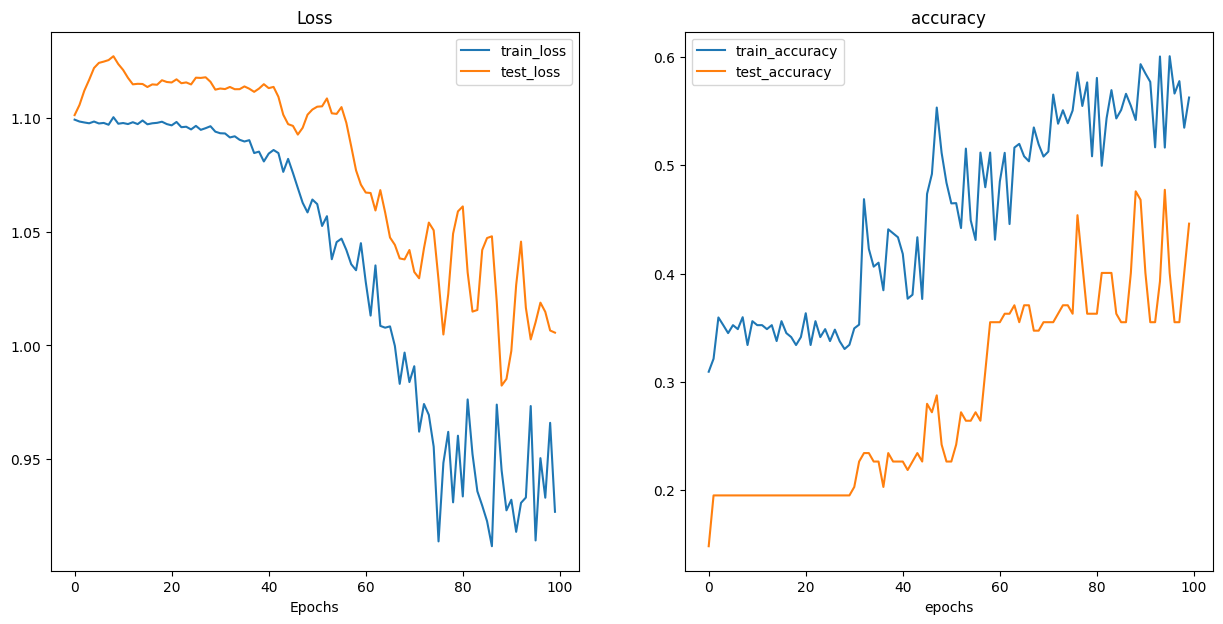

In [208]:
plot_loss_curves(model_1_results)

with data augmentation it actually was worse

but it is clearly overfitting

lets compare model results:

this is done through:
hardcoding
tools like tensorboard
weights and biases
mlflow

In [165]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [166]:
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.107118   0.250000   1.106111  0.260417
1    1.078373   0.425781   1.139709  0.260417
2    1.080407   0.425781   1.170026  0.260417
3    1.127795   0.304688   1.157017  0.260417
4    1.089007   0.425781   1.143259  0.260417

In [167]:
model_1_df

train_loss  train_acc  test_loss  test_acc
0    1.110243   0.280066   1.088227  0.656250
1    1.095122   0.368016   1.141847  0.195312
2    1.098508   0.363400   1.176977  0.195312
3    1.099409   0.352391   1.170633  0.195312
4    1.100281   0.345052   1.155149  0.195312

plot next to eachother

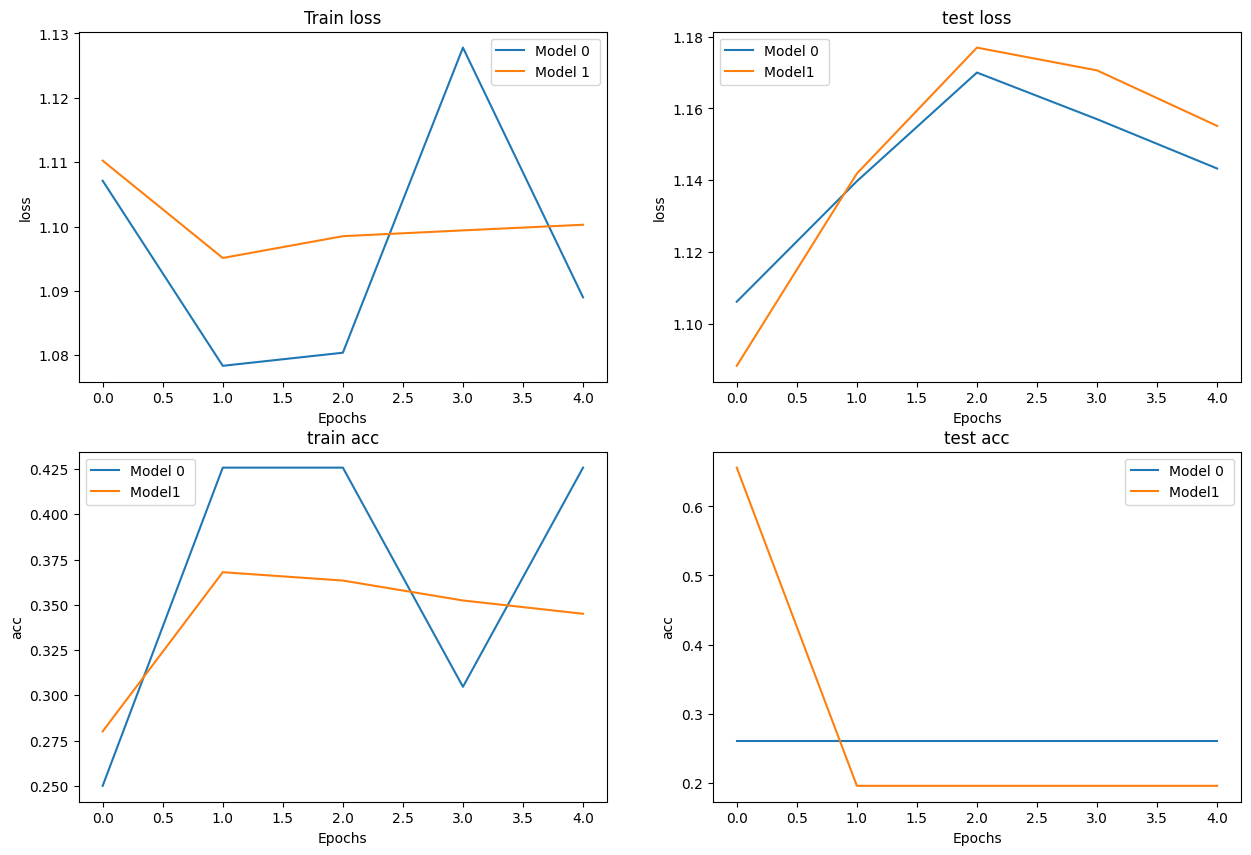

In [168]:
plt.figure(figsize = (15,10))


epochs = range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df['train_loss'],label = 'Model 0 ')
plt.plot(epochs,model_1_df['train_loss'], label = 'Model 1 ')
plt.title('Train loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()


plt.subplot(2,2,2)
plt.plot(epochs,model_0_df['test_loss'],label = 'Model 0 ')
plt.plot(epochs,model_1_df['test_loss'], label = 'Model1 ')
plt.title('test loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()


plt.subplot(2,2,3)
plt.plot(epochs,model_0_df['train_acc'],label = 'Model 0 ')
plt.plot(epochs,model_1_df['train_acc'], label = 'Model1 ')
plt.title('train acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()


plt.subplot(2,2,4)
plt.plot(epochs,model_0_df['test_acc'],label = 'Model 0 ')
plt.plot(epochs,model_1_df['test_acc'], label = 'Model1 ')
plt.title('test acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

jee wizz these are bad

making a predictoin on a custom image


make predictions on stuff not in either train or testing dataset



In [169]:
###ONLY RUN THIS IF WITH COLAB KERNEL


import requests
from pathlib import Path

# Create a data folder in the Colab environment
data_path = Path("/content/data")
data_path.mkdir(parents=True, exist_ok=True)

custom_image_path = data_path / "04-pizza-dad.jpeg"

# Use the RAW URL
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    print(f"Downloading to Colab: {custom_image_path}")
    r = requests.get(url)
    with open(custom_image_path, "wb") as f:
        f.write(r.content)

print(f"File is now at: {custom_image_path.resolve()}")

File is now at: /content/data/04-pizza-dad.jpeg


In [170]:
import os
import requests
from pathlib import Path
import torchvision

# 1. Setup path (Local friendly)
data_path = Path("data")
data_path.mkdir(parents=True, exist_ok=True)
custom_image_path = data_path / "04-pizza-dad.jpeg"

# 2. DELETE the corrupted file if it exists
if custom_image_path.exists():
    os.remove(custom_image_path)
    print("Deleted corrupted file.")

# 3. Download the REAL image (Notice the 'main' in the URL)
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg"

print(f"Downloading real image from: {url}")
r = requests.get(url)

if r.status_code == 200:
    with open(custom_image_path, "wb") as f:
        f.write(r.content)
    print("Download successful!")
else:
    print(f"Download failed with status code: {r.status_code}")

# 4. Try to open it in Python
try:
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
    print(f"Successfully opened! Image shape: {custom_image_uint8.shape}")
except Exception as e:
    print(f"Still can't open it. Error: {e}")

Deleted corrupted file.
Download successful!
Successfully opened! Image shape: torch.Size([3, 4032, 3024])


loading in a cusotom image with pytorch
must be in the same format as the data our model was trained on

In [171]:
#read in custom image:

import torchvision

custom_image_uint8 = torchvision.io.read_image(custom_image_path)
custom_image_f32 = torchvision.io.read_image(custom_image_path).type(torch.float32)/255.0

custom_image_f32

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

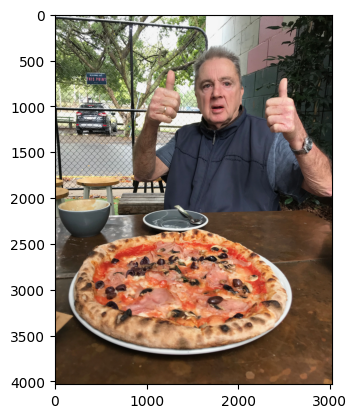

In [172]:
import matplotlib.pyplot as plt
plt.imshow(custom_image_uint8.permute(1,2,0))

###AYYY BIG MANN TING

In [173]:
print(f'custom image tensor:\n{custom_image_f32}')
print(f'custom image shape:{custom_image_f32.shape}')
print(f'custom image datatype:{custom_image_f32.dtype}')

custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

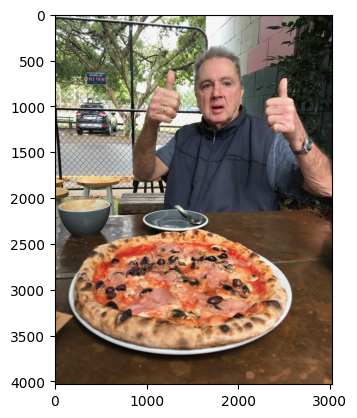

In [174]:
plt.imshow(custom_image_f32.permute(1,2,0))

very big, shape error

shapes wrong must transform


In [175]:
import torchvision.transforms as transforms

custom_image_transform = transforms.Compose([transforms.Resize(size = (64,64)),
                                       ])
custom_image_f32 = custom_image_transform(custom_image_f32).to(device)

print(f'resized custom image shape:{custom_image_f32.shape}')

resized custom image shape:torch.Size([3, 64, 64])


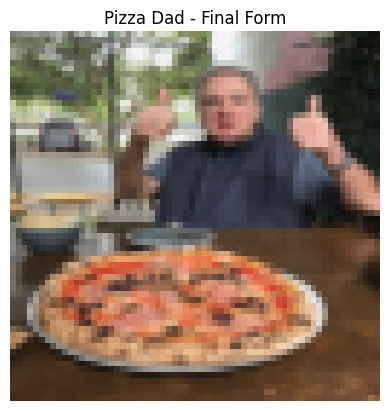

In [176]:
# .cpu() moves it from MPS to CPU
# .permute(1, 2, 0) moves color from the front to the back
plt.imshow(custom_image_f32.cpu().permute(1, 2, 0))
plt.title("Pizza Dad - Final Form")
plt.axis(False); # Hide the coordinate numbers

making predictions on image with trained pytorch model

In [177]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_f32.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.1178,  0.0472, -0.0897]], device='cuda:0')

to make a prediction on custom image we must:
load image and turn into a tensor
make sure the image was the same dataype as the model(torch.flaot32)
make sure the image was the same shape as the data in the model
make sure its on the same device

In [178]:
#Convert logits to prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred,dim = 1)
custom_image_pred_probs

#convert prediction probabilities to prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs,dim = 1)
custom_image_pred_label.item()
class_names[custom_image_pred_label.item()]

'pizza'

uhhh thats bad😭

functionise noW!


ideal outcome:
fucntion where we pass a image path to and have our model predict on that image and plot the image + prediciton

In [179]:
def pred_and_plot_image(model:torch.nn.Module, image_path:Path, class_names:List[str], transform = None, device: torch.device = device):
    #load in image and convert to tensor
    image = torchvision.io.read_image(str(image_path)).type(torch.float32)/255.0

    #apply transform if necessary
    if transform:
        image = transform(image)

    #put image on target device
    image = image.to(device)

    #make sure model is in eval mode
    model.eval()

    with torch.inference_mode():
        #pass the image through the model and get predictions
        pred_logits = model(image.unsqueeze(0))

        #convert logits to pred probs
        pred_probs = torch.softmax(pred_logits,dim = 1)

        #convert prediction probabilities to prediction labels
        pred_label = torch.argmax(pred_probs,dim = 1)

    #plot the image
    plt.imshow(image.cpu().permute(1,2,0))
    plt.title(f'Predicted class:{class_names[pred_label.item()]}, prob:{pred_probs.max().item():.3f}')
    plt.axis(False)
    plt.show()

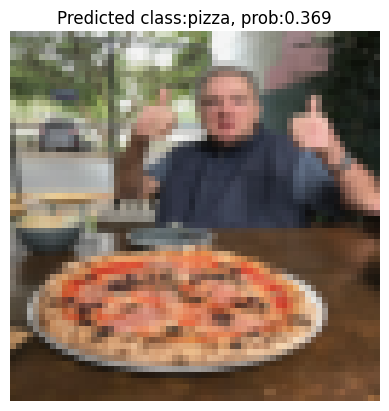

In [180]:
custom_image_path = "data/04-pizza-dad.jpeg"

pred_and_plot_image(model = model_0,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform =custom_image_transform,
                    device = device)

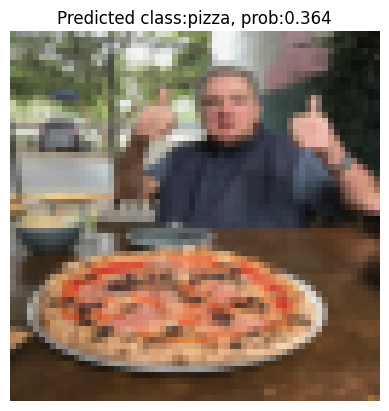

In [181]:
custom_image_path = "data/04-pizza-dad.jpeg"

pred_and_plot_image(model = model_1,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform =custom_image_transform,
                    device = device)

exercises so you dont forget HAYDEN: https://www.learnpytorch.io/04_pytorch_custom_datasets/#exercises

In [133]:
#save and load model 

from pathlib import Path
#create model directory path

MODEL_PATH =Path('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/models')
MODEL_PATH.mkdir(parents = True,exist_ok = True)

MODEL_NAME = '04_Pytorch_customdataset_model_0.pth'


MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save modell state dict

print(f'saving model to:{MODEL_SAVE_PATH}')
torch.save(obj =model_0.state_dict(),f = MODEL_SAVE_PATH)


import os
print(f"Your current folder is: {os.getcwd()}")
print(f"The file should be at: {MODEL_SAVE_PATH.absolute()}")
print(f"Does the file exist? {MODEL_SAVE_PATH.exists()}")








saving model to:/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/models/04_Pytorch_customdataset_model_0.pth
Your current folder is: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files
The file should be at: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/models/04_Pytorch_customdataset_model_0.pth
Does the file exist? True


In [140]:
#load model state dict

model_0_loaded = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_0_loaded.eval()

model_0_loaded.state_dict()



OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.1434,  0.1560, -0.0489],
                        [ 0.1729, -0.0460,  0.0350],
                        [-0.0975,  0.1092,  0.1658]],
              
                       [[-0.1447,  0.1637,  0.0324],
                        [ 0.1385,  0.0224,  0.0891],
                        [-0.0309,  0.1447,  0.0248]],
              
                       [[-0.0932,  0.0457, -0.0922],
                        [-0.0262, -0.0817,  0.1241],
                        [-0.1556, -0.0924, -0.0579]]],
              
              
                      [[[-0.1167,  0.0173, -0.1910],
                        [ 0.1728, -0.1645,  0.1475],
                        [ 0.0310, -0.0637,  0.1178]],
              
                       [[ 0.0290,  0.1546,  0.0202],
                        [-0.0618,  0.0505, -0.0534],
                        [ 0.0797,  0.1705,  0.1079]],
              
                       [[-0.0852,  0.1102,  0.0334],
                 

In [135]:

#save and load model meow

from pathlib import Path
#create model directory path

MODEL_PATH =Path('/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/models')
MODEL_PATH.mkdir(parents = True,exist_ok = True)

MODEL_NAME = '04_Pytorch_customdataset_model_1.pth'


MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save modell state dict

print(f'saving model to:{MODEL_SAVE_PATH}')
torch.save(obj =model_1.state_dict(),f = MODEL_SAVE_PATH)


import os
print(f"Your current folder is: {os.getcwd()}")
print(f"The file should be at: {MODEL_SAVE_PATH.absolute()}")
print(f"Does the file exist? {MODEL_SAVE_PATH.exists()}")


saving model to:/Users/haydenfletcher/Documents/programming/books-course/PTFDLML/models/04_Pytorch_customdataset_model_1.pth
Your current folder is: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/notes/files
The file should be at: /Users/haydenfletcher/Documents/programming/books-course/PTFDLML/models/04_Pytorch_customdataset_model_1.pth
Does the file exist? True


In [ ]:
#load model state dict

model_1_loaded = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_1_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_1_loaded.eval()


model_1_loaded.state_dict()





False
